# Task 1: Data Exploration

Gruppe Nummer: 1
- Samuel Hempelt
- Andreas Luakat
- John Torres

**Task Description:**

- Explore the provided data set using descriptive statistics (e.g. mean values, standard deviations, min/max values, missing values) and visualizations (e.g. histograms, boxplots)
- Present the insights you gained from exploration
- Also point out which data quality issues you identified in terms of: 
    - Missing values 
    - Outliers
    - Features to be transformed (e.g normalization) transformation
    - Features to be removed (feature selection)
    - Other insights which require attention in the following phases
- Document and present your learnings from the coding for this task

### Libraries

In [1]:
import seaborn as sns  
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import missingno as msno

### Import Data

In [2]:
df = pd.read_csv("../../data/raw/triathlon_watch_training_data_final.csv")

## Data Structure Analysis

In [6]:
df.head()

,ID,Age of customer,Sex,Ctry,Town,Swimming Hours per Week,Biking Hours per Week,Running Hours per Week,Total Training Hours per Week,VO2 Max,...,Calories Burned per Week,Support Cases of Customer,Customer Years,Most current software update,Goal of Training,Preferred Training Daytime,Subscription Type,Color of Watch,Synchronisation,User of latest model
0,C0001,61.0,Other,UK,Birmingham,2.52,0.10,1.78,4.40,23.08,...,2329.95,2.0,1.0,2024-07-22,Fitness,Evening,Free,White,Yes,1.0
1,C0003,57.0,Other,Australia,Sydney,1.55,10.01,4.57,16.13,39.04,...,7904.93,2.0,1.0,2024-05-11,Fitness,Evening,Premium,Black,Yes,0.0
2,C0004,30.0,Other,India,Bangalore,1.19,12.04,8.64,21.87,71.59,...,10839.81,2.0,0.0,2024-08-16,Competition,Afternoon,Free,White,Yes,1.0
3,C0005,21.0,Male,Germany,Munich,2.25,4.67,0.92,7.84,49.09,...,NaN,3.0,0.0,2024-08-11,Recreation,Evening,Premium,Black,No,1.0
4,C0006,63.0,Male,India,Mumbai,0.80,5.88,0.67,7.35,13.91,...,3575.96,3.0,3.0,2024-11-18,Recreation,Morning,Basic,Black,Yes,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             978 non-null    object 
 1   Age of customer                978 non-null    float64
 2   Sex                            978 non-null    object 
 3   Ctry                           978 non-null    object 
 4   Town                           939 non-null    object 
 5   Swimming Hours per Week        978 non-null    float64
 6   Biking Hours per Week          954 non-null    float64
 7   Running Hours per Week         978 non-null    float64
 8   Total Training Hours per Week  978 non-null    float64
 9   VO2 Max                        975 non-null    float64
 10  10k Running Time Prediction    978 non-null    float64
 11  Calories Burned per Week       959 non-null    float64
 12  Support Cases of Customer      978 non-null    fl

<Axes: >

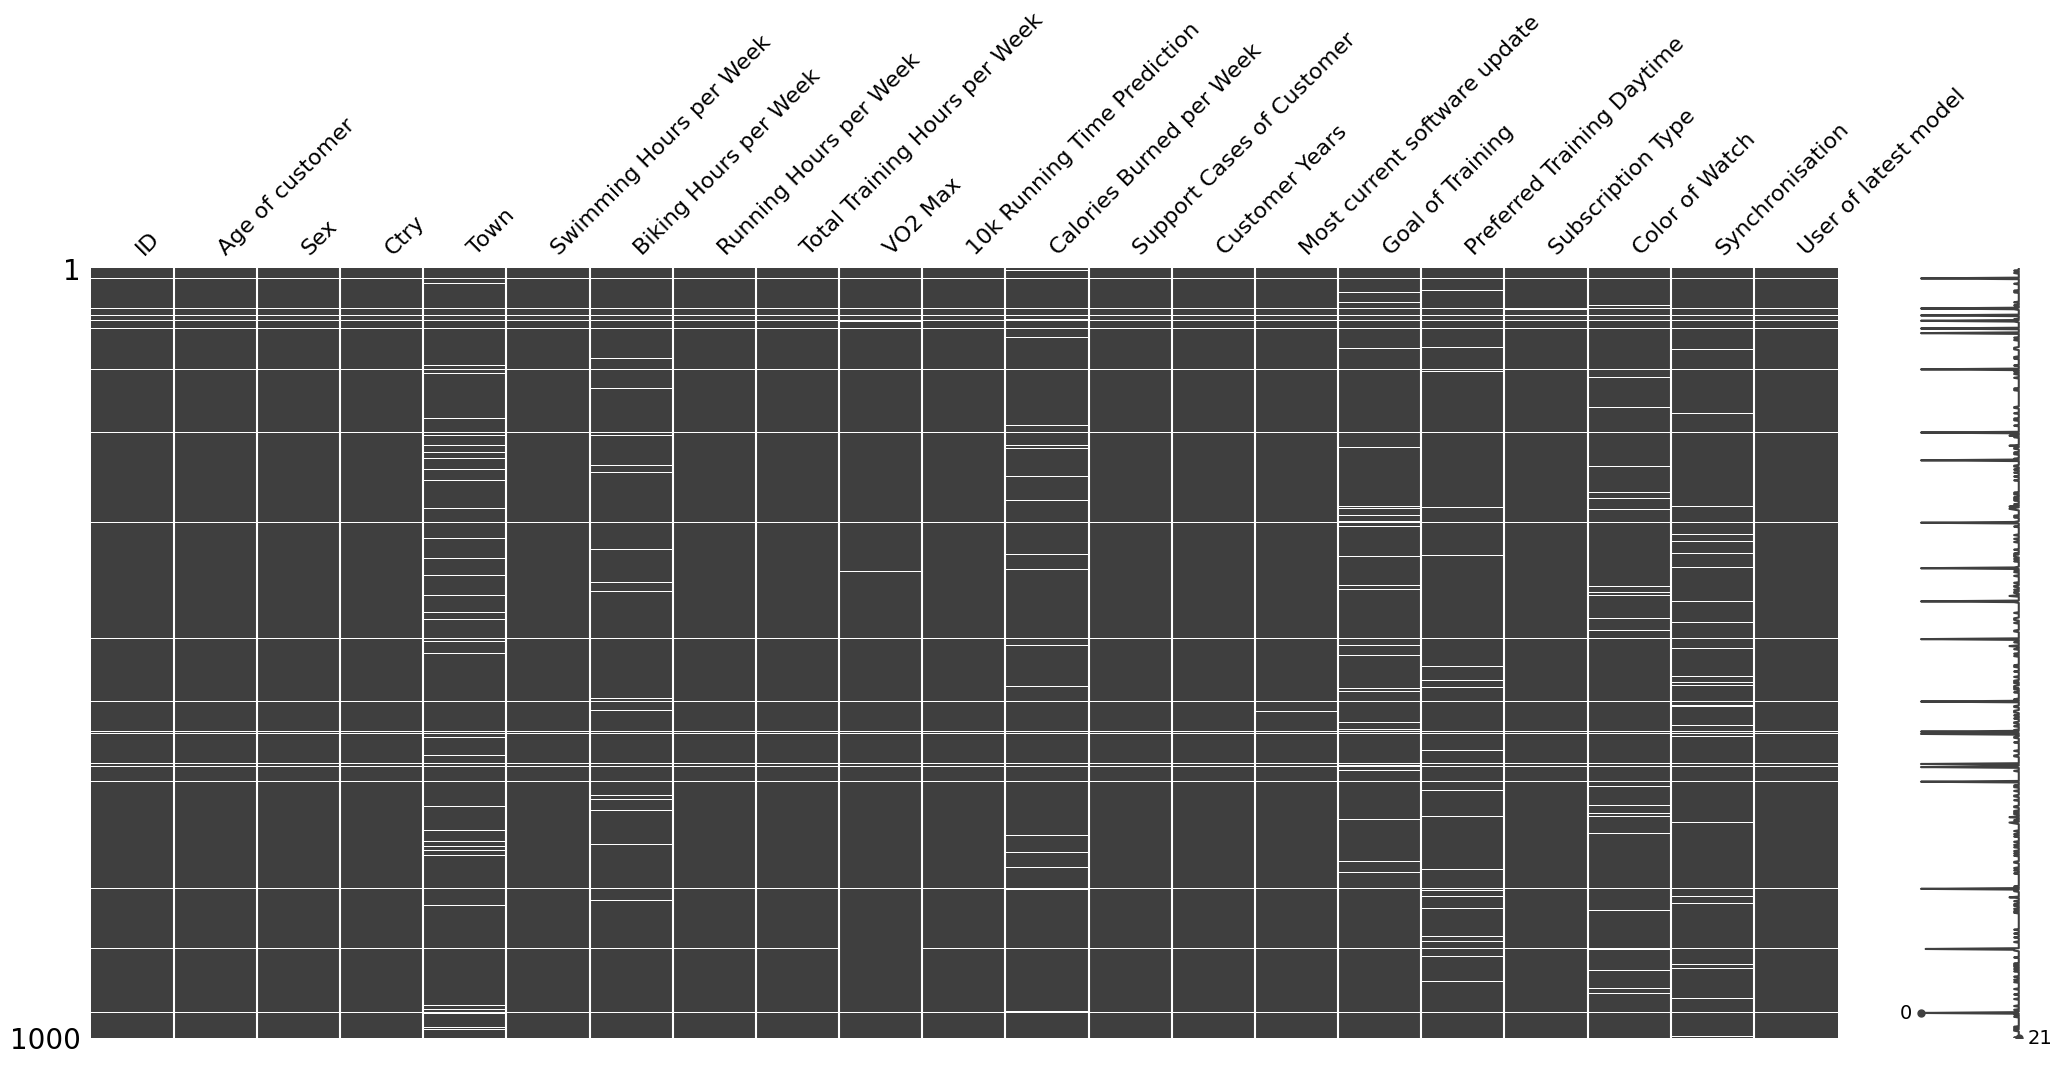

In [3]:
# Check for missing values
msno.matrix(df)

We can oberve that the input dataset provided in the file `triathlon_watch_training_data_final.csv` contains 1000 rows and 21 columns. Using the python package `missingno` we also observe that the are multiple missing values. Problematic are the ones which are missing in the target columns `user_of_latest_model`, here we will have to remove them complete them, since there is no way to extrapolate this values. Regarding the missing values of the other columns, there are multiple techniques which will be applied to handle them. 

### Data corrections

In [7]:
# Make sure column names are lower case and eliminate spaces
# Replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

Transition of the column "most_current_software_update" in a numeric datatype: Calculate the `Age` of the latest software update in days.

In [8]:
df["most_current_software_update"] = pd.to_datetime(df["most_current_software_update"], format="%Y-%m-%d")
df["most_current_software_update"] = df["most_current_software_update"].max() - df["most_current_software_update"]
df["most_current_software_update"] = df["most_current_software_update"].dt.days

### Descriptive statistics

In [76]:
# Append all categorical and numeric columns to different lists
categorical_cols = df.select_dtypes(include=['object']).columns.to_list()
numeric_cols = df.select_dtypes(include=['float64']).columns.tolist()
target_col = "user_of_latest_model"

In [63]:
print("The numerical columns are: ", numeric_cols)  
print("The categorical columns are: ", categorical_cols)
print("The target column is: ", target_col)
print("The dataset has ", len(df), " rows and ", len(df.columns), " columns")

The numerical columns are:  ['age_of_customer', 'swimming_hours_per_week', 'biking_hours_per_week', 'running_hours_per_week', 'total_training_hours_per_week', 'vo2_max', '10k_running_time_prediction', 'calories_burned_per_week', 'support_cases_of_customer', 'customer_years', 'most_current_software_update', 'user_of_latest_model']
The categorical columns are:  ['id', 'sex', 'ctry', 'town', 'goal_of_training', 'preferred_training_daytime', 'subscription_type', 'color_of_watch', 'synchronisation']
The target column is:  user_of_latest_model
The dataset has  1000  rows and  21  columns


## Numerical Columns Exploration

In [13]:
df.filter(numeric_cols).describe().round(2)

,age_of_customer,swimming_hours_per_week,biking_hours_per_week,running_hours_per_week,total_training_hours_per_week,vo2_max,10k_running_time_prediction,calories_burned_per_week,support_cases_of_customer,customer_years,most_current_software_update,user_of_latest_model
count,978.00,978.00,954.00,978.00,978.00,975.00,978.00,959.00,978.00,978.00,977.00,978.00
mean,40.53,2.23,5.53,3.26,11.45,51.37,45.61,5487.53,1.96,3.79,220.00,0.41
std,14.07,1.60,3.50,2.17,8.04,21.46,7.55,2499.74,1.41,2.92,128.87,0.49
min,-1.00,0.00,0.00,0.00,0.15,10.22,29.12,-47.26,0.00,0.00,0.00,0.00
25%,29.00,1.02,2.77,1.63,7.38,42.07,40.30,3661.94,1.00,1.00,110.00,0.00
50%,41.00,2.02,5.11,2.93,10.22,53.40,43.88,5168.41,2.00,3.00,221.00,0.00
75%,53.00,3.19,7.87,4.60,14.10,60.10,50.26,7000.84,3.00,6.00,329.00,1.00
max,64.00,9.97,16.11,11.87,100.00,247.26,67.06,13280.06,4.00,11.00,448.00,1.00


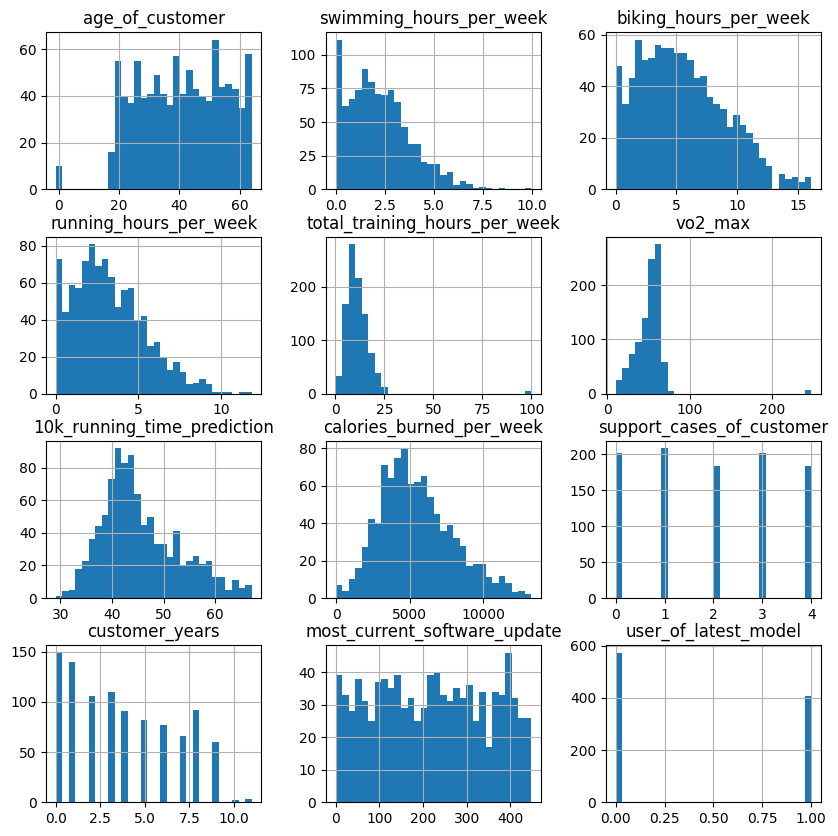

In [44]:
# Showing the distribution of the numerical data with histograms
%matplotlib inline
hist = df.hist(bins=30,figsize=(10, 10))

The columns swimming_hours_per_week, biking_hours_per_week, running_hours_per_week, 10k_running_time_prediction, calories_burned_per_week, customer_years, most_current_software_update have to be tranformed in order to achieve more normal distribution.

The columns 'total_training_hours_per_week' and 'vo2_max' show a right skew distribution which might point out the presence of outliers.

In [ ]:
# Analyzing the mean of the numerical columns grouped by the target column
df[numeric_cols].groupby(['user_of_latest_model']).mean().T.round(2)

user_of_latest_model,0.0,1.0
age_of_customer,44.91,34.33
swimming_hours_per_week,2.00,2.55
biking_hours_per_week,4.86,6.49
running_hours_per_week,2.91,3.75
total_training_hours_per_week,9.93,13.59
vo2_max,46.72,57.43
10k_running_time_prediction,47.97,42.28
calories_burned_per_week,4913.48,6307.20
support_cases_of_customer,1.81,2.17
customer_years,4.12,3.32


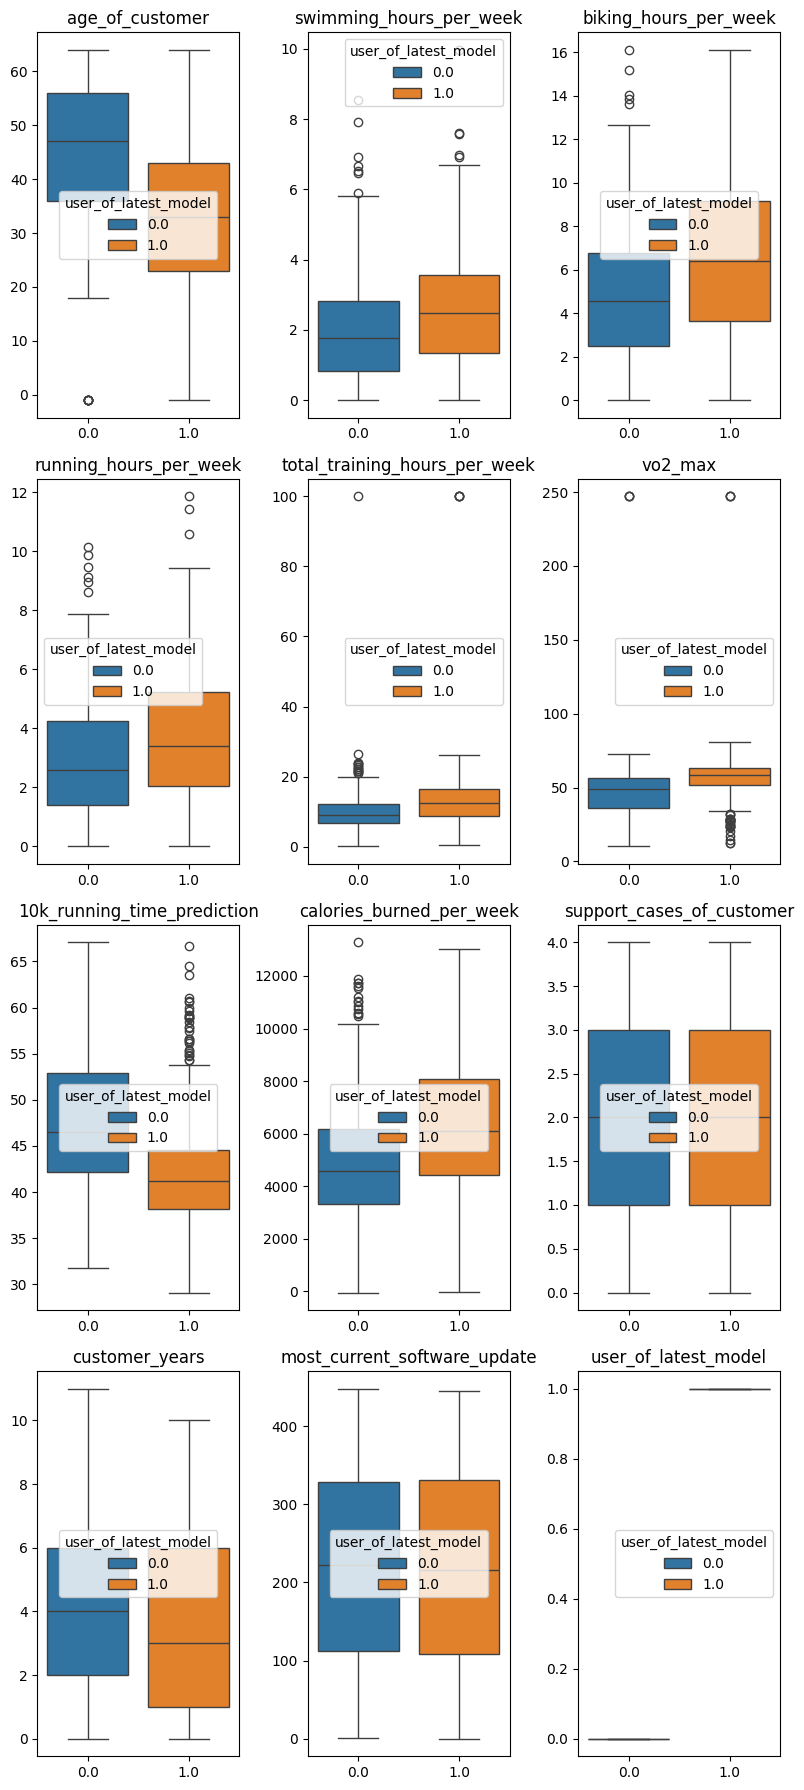

In [61]:
# Showing the effect of the numerical data on the target variable
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(8, 18))
axes = axes.flat

for ax, col in zip(axes, numeric_cols):
    sns.boxplot(data=df, x='user_of_latest_model', y=col, ax=ax, hue='user_of_latest_model')
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()

Here we can observe that the numerical columns have a significant effect on the target variable. In particular `age_of_customer`, `vo2_max` and `10k_running_time_prediction`, in which we observe a difference in the means of the numerical values when plotting the target value `1` or `0`. 

#### Correlation Analysis

<Axes: >

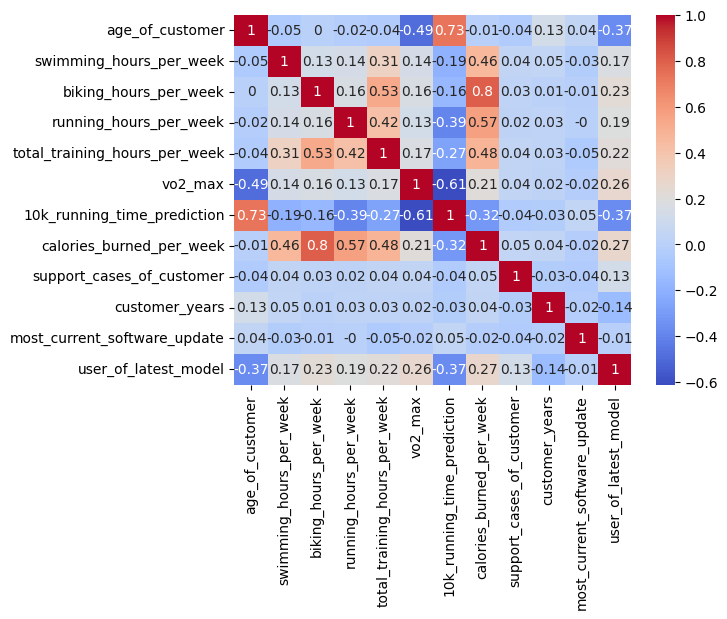

In [62]:
# showing the correlation between the numerical data
corr = df[numeric_cols].corr().round(2)
sns.heatmap(corr, cmap="coolwarm", annot=True)

Analyzing the numeric features, we can identify that the target column `user_of_latest_model` shows a relative correlation with the variables:

- **Negative**:
  - 10k_running_time_prediction
  - age_of_customer

- **Positive**:
  - vo2_max
  - total_training_hours_per_week
  - calories_burned_per_week

The most relevant predictors on the response variable seem to have some outlier, which have to be handled in the data preparation.

#### Anova Test Analysis - Numerical Columns to Target Binary Column

Howerver since our target column is categorical we can use the anova test to check the correlation between the numerical columns and the target column. The simple correlation value we so before gives only a partial analysis of the impact of the features to the target variable. 

ANOVA (Analysis of Variance) is used to compare the means of a numerical variable across multiple groups. While our target is binary (two groups), we can still use ANOVA by re-framing the situation.

How It Works with a Binary Target:

- The two values of our binary target (e.g., 0 and 1) naturally define two distinct groups, Yes: Adopters of latest Watch Model. No: No Adopters of Latest Watch Model.
- **Compare the Means of the Numerical Columns**: For each group defined by the target, we calculate the mean of the numerical column.

**ANOVA's Goal**: ANOVA then assesses whether the difference between these two means is statistically significant. In other words, does knowing which group an observation belongs to (target value) tell us anything about its value in the numerical column?

In [105]:
#create a new dataframe with p-values of anova test for each numeric feature with label
from scipy.stats import f_oneway
num_cols = [col for col in numeric_cols if col not in [target_col]]
anova_p_values = pd.DataFrame(index=num_cols, columns=['p-value'])
target_categories = [0,1]

for pred_num_col in num_cols:
    data_anova = df[[pred_num_col] + [target_col]].copy()
    data_anova.dropna(subset=[target_col], inplace=True)
    data_anova[pred_num_col] = data_anova[pred_num_col].fillna(df[pred_num_col].mean())
    data_anova[target_col] = data_anova[target_col].astype(int)
    groups = []
    for target_category in target_categories:
        groups.append(data_anova[data_anova[target_col]==target_category][pred_num_col])
    stat, p = f_oneway(*groups)
    anova_p_values.loc[pred_num_col,'p-value'] = p
    
anova_p_values

,p-value
age_of_customer,0.0
swimming_hours_per_week,0.0
biking_hours_per_week,0.0
running_hours_per_week,0.0
total_training_hours_per_week,0.0
vo2_max,0.0
10k_running_time_prediction,0.0
calories_burned_per_week,0.0
support_cases_of_customer,0.000077
customer_years,0.000022


For all numerical features, except the column `most_recent_software_update` the p-value are less than 0.05, which means that the features are significant for the model. This shows us a more clear relationship of the distributions of the numerical values and the fact whether someone will have the lastet watch model or not. This result was not clear when using the correlation matrix. 

## Categorical Data Exploration

In [65]:
df.filter(categorical_cols).describe().T.round(2)

,count,unique,top,freq
id,978,971,C0708,2
sex,978,3,Male,345
ctry,978,7,Australia,200
town,939,15,Berlin,76
goal_of_training,950,3,Fitness,332
preferred_training_daytime,954,3,Morning,334
subscription_type,977,3,Free,341
color_of_watch,946,2,Black,691
synchronisation,950,2,Yes,840


#### Duplicated Values Analysis

In [67]:
df[df["id"].duplicated()].dropna()

,id,age_of_customer,sex,ctry,town,swimming_hours_per_week,biking_hours_per_week,running_hours_per_week,total_training_hours_per_week,vo2_max,...,calories_burned_per_week,support_cases_of_customer,customer_years,most_current_software_update,goal_of_training,preferred_training_daytime,subscription_type,color_of_watch,synchronisation,user_of_latest_model
60,C0059,62.0,Other,UK,London,0.00,5.00,2.80,7.80,20.49,...,3694.24,3.0,1.0,128.0,Recreation,Morning,Free,Black,No,0.0
480,C0482,62.0,Female,Australia,Melbourne,0.62,10.05,4.96,15.62,28.89,...,7664.95,1.0,1.0,261.0,Competition,Afternoon,Basic,Black,Yes,1.0
642,C0640,29.0,Other,Australia,Melbourne,5.06,1.44,0.25,6.75,54.86,...,3233.52,0.0,3.0,40.0,Fitness,Evening,Basic,Black,Yes,0.0
645,C0641,53.0,Male,UK,Manchester,1.87,5.58,2.37,9.81,44.88,...,4785.35,3.0,0.0,359.0,Recreation,Evening,Premium,Black,Yes,0.0
714,C0708,55.0,Other,UK,Birmingham,0.40,5.89,2.07,8.37,40.73,...,4460.39,0.0,7.0,84.0,Recreation,Morning,Premium,White,No,0.0
940,C0942,58.0,Female,Germany,Berlin,1.02,0.00,2.92,3.95,34.41,...,1688.93,2.0,4.0,282.0,Fitness,Afternoon,Free,White,Yes,0.0


Here we can observe that the `id's` are not unique. We have 971 unique id's but 978 entries. That means that we have duplicated entries per user. It is important to verify that the target variable is not different for the same id's otherwise it will be an inconsistency for the model.

In [69]:
for id in df[df["id"].duplicated()].dropna()["id"].unique():
    assert df[df["id"]==id]['user_of_latest_model'].nunique() == 1, "There are duplicated IDs with different user_of_latest_model"
    print("There are no duplicated IDs with different user_of_latest_model for id: ", id)

There are no duplicated IDs with different user_of_latest_model for id:  C0059
There are no duplicated IDs with different user_of_latest_model for id:  C0482
There are no duplicated IDs with different user_of_latest_model for id:  C0640
There are no duplicated IDs with different user_of_latest_model for id:  C0641
There are no duplicated IDs with different user_of_latest_model for id:  C0708
There are no duplicated IDs with different user_of_latest_model for id:  C0942


Using the assert function we can check if there are duplicated IDs with different user_of_latest_model. If the assert function does not raise an error, then there are no duplicated IDs with different user_of_latest_model. 

In [66]:
#show unique values categorical variables
for col in categorical_cols:
    if df[col].nunique() < 20:
        print(f'{col}: {df[col].unique()}')

sex: ['Other' 'Male' 'Female' nan]
ctry: ['UK' 'Australia' 'India' 'Germany' 'USA' 'Germayn' nan 'UnknownLand']
town: ['Birmingham' 'Sydney' 'Bangalore' 'Munich' 'Mumbai' nan 'New York'
 'Chicago' 'Hamburg' 'London' 'Manchester' 'Berlin' 'Brisbane' 'Melbourne'
 'Delhi' 'Los Angeles']
goal_of_training: ['Fitness' 'Competition' 'Recreation' nan]
preferred_training_daytime: ['Evening' 'Afternoon' 'Morning' nan]
subscription_type: ['Free' 'Premium' 'Basic' nan]
color_of_watch: ['White' 'Black' nan]
synchronisation: ['Yes' 'No' nan]


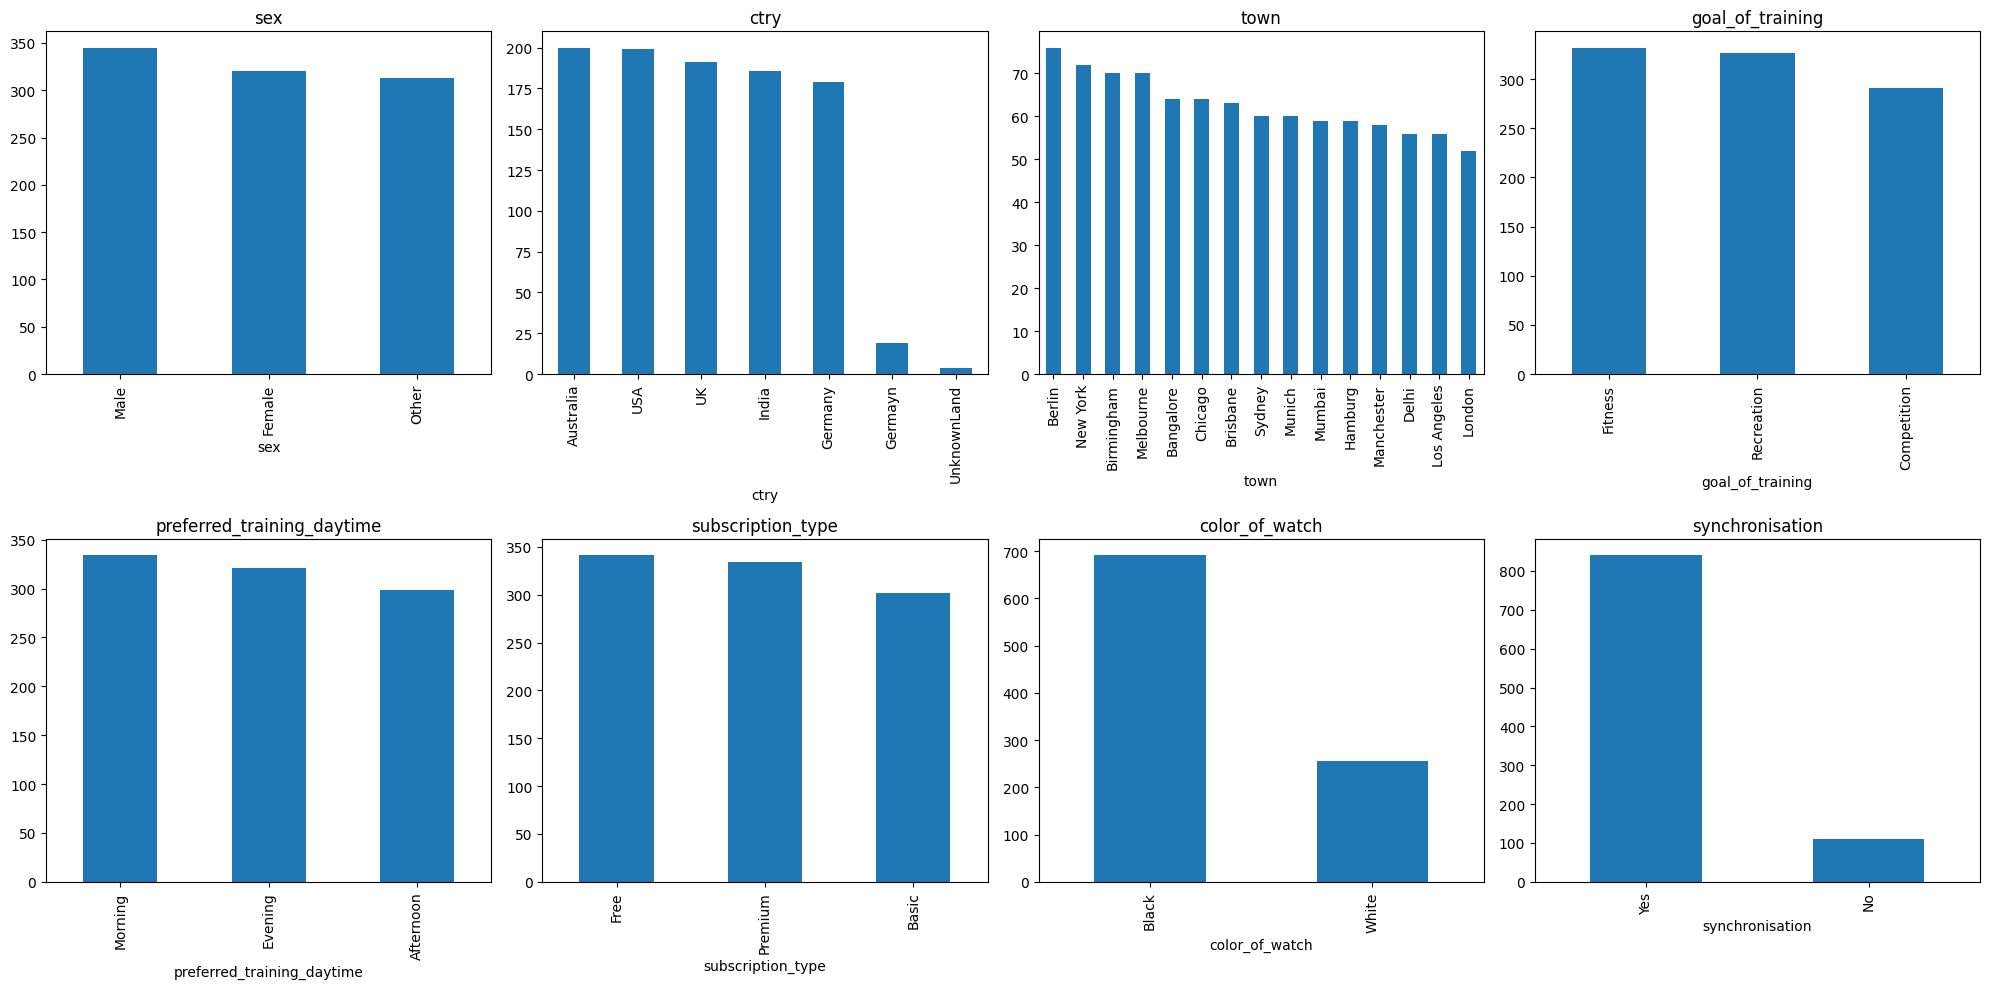

In [ ]:
import matplotlib.pyplot as plt
cat_cols = [col for col in categorical_cols if col not in ["id"]]

fig, ax = plt.subplots(2, len(cat_cols)//2, figsize=(20, 10))
for i, col in enumerate(cat_cols):
    df[col].value_counts().plot(kind='bar', ax=ax[i//4, i%4], title=col)
fig.tight_layout()


In order to analyze the categorical data, we will use the chi-square test to determine if there is a significant relationship between the categorical variables and the target variable. The null hypothesis is that there is no relationship between the variables, while the alternative hypothesis is that there is a relationship between the variables.

The Chi-Square (χ²) test is a statistical method often used for feature selection in non-continuous (categorical) data. It measures the dependence between a categorical feature and a target class (also categorical) to determine whether the feature is significantly associated with the target. A large χ² value indicates that the feature and the target are likely dependent

In [88]:
# perform chi-squared test for nominal features
from scipy.stats import chi2_contingency

non_cont_columns = categorical_cols + [target_col]

#create a new dataframe which contains chi2 values for all feature combinations
chi2_values = pd.DataFrame(index=non_cont_columns, columns=non_cont_columns)
for i in non_cont_columns:
    for j in non_cont_columns:
        df_chi2 = df[[i,j]]
        data_cont=pd.crosstab(df_chi2.iloc[:,0], df_chi2.iloc[:,1])
        stat, p, dof, expected = chi2_contingency(data_cont)
        chi2_values.loc[i,j] = p

<Axes: >

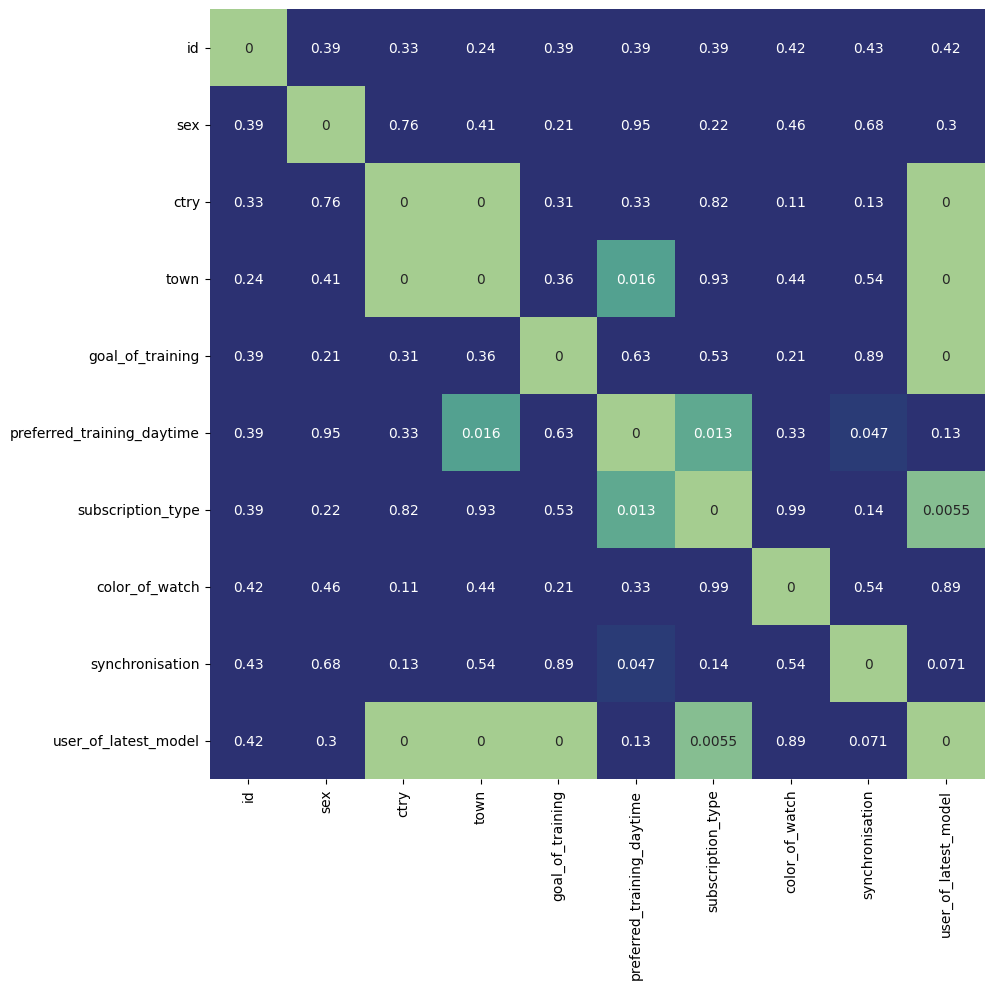

In [89]:
#display chi2 p-values as a color coded heatmap with a threshold of 0.05, round p-values to 2 digits
plt.figure(figsize=(10,10))
sns.heatmap(round(chi2_values.astype(float),4), annot=True, cmap='crest', cbar=False, vmin=0, vmax=0.05)

We can confirm that the column 'id' is not relevant for our target variable, since the p values is greater than 0.05. We can drop this column. On the other hand, we can see that the relevant columns for the target variables, with p value lower than 0.05 are: 

- country 
- town 
- goal of training
- subscription type

## Target Column Analysis

<Axes: title={'center': 'user_of_latest_model'}, xlabel='user_of_latest_model'>

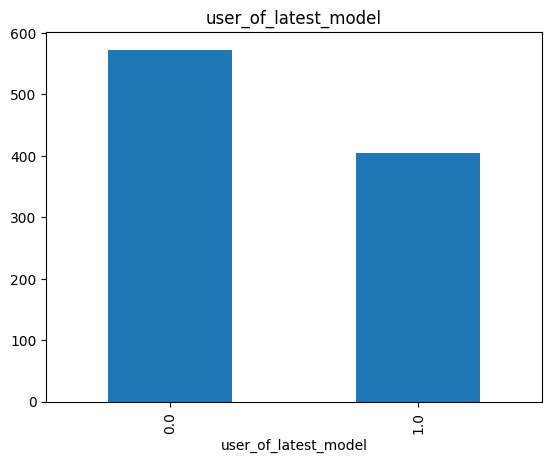

In [110]:
df[target_col].value_counts().plot(kind='bar', title=target_col)

The target column contains only two values. We can observe that the ditribution of the target column is not balanced. There are more sample values for people who have not bought the latest model.

## Missing Values Analysis

<Axes: >

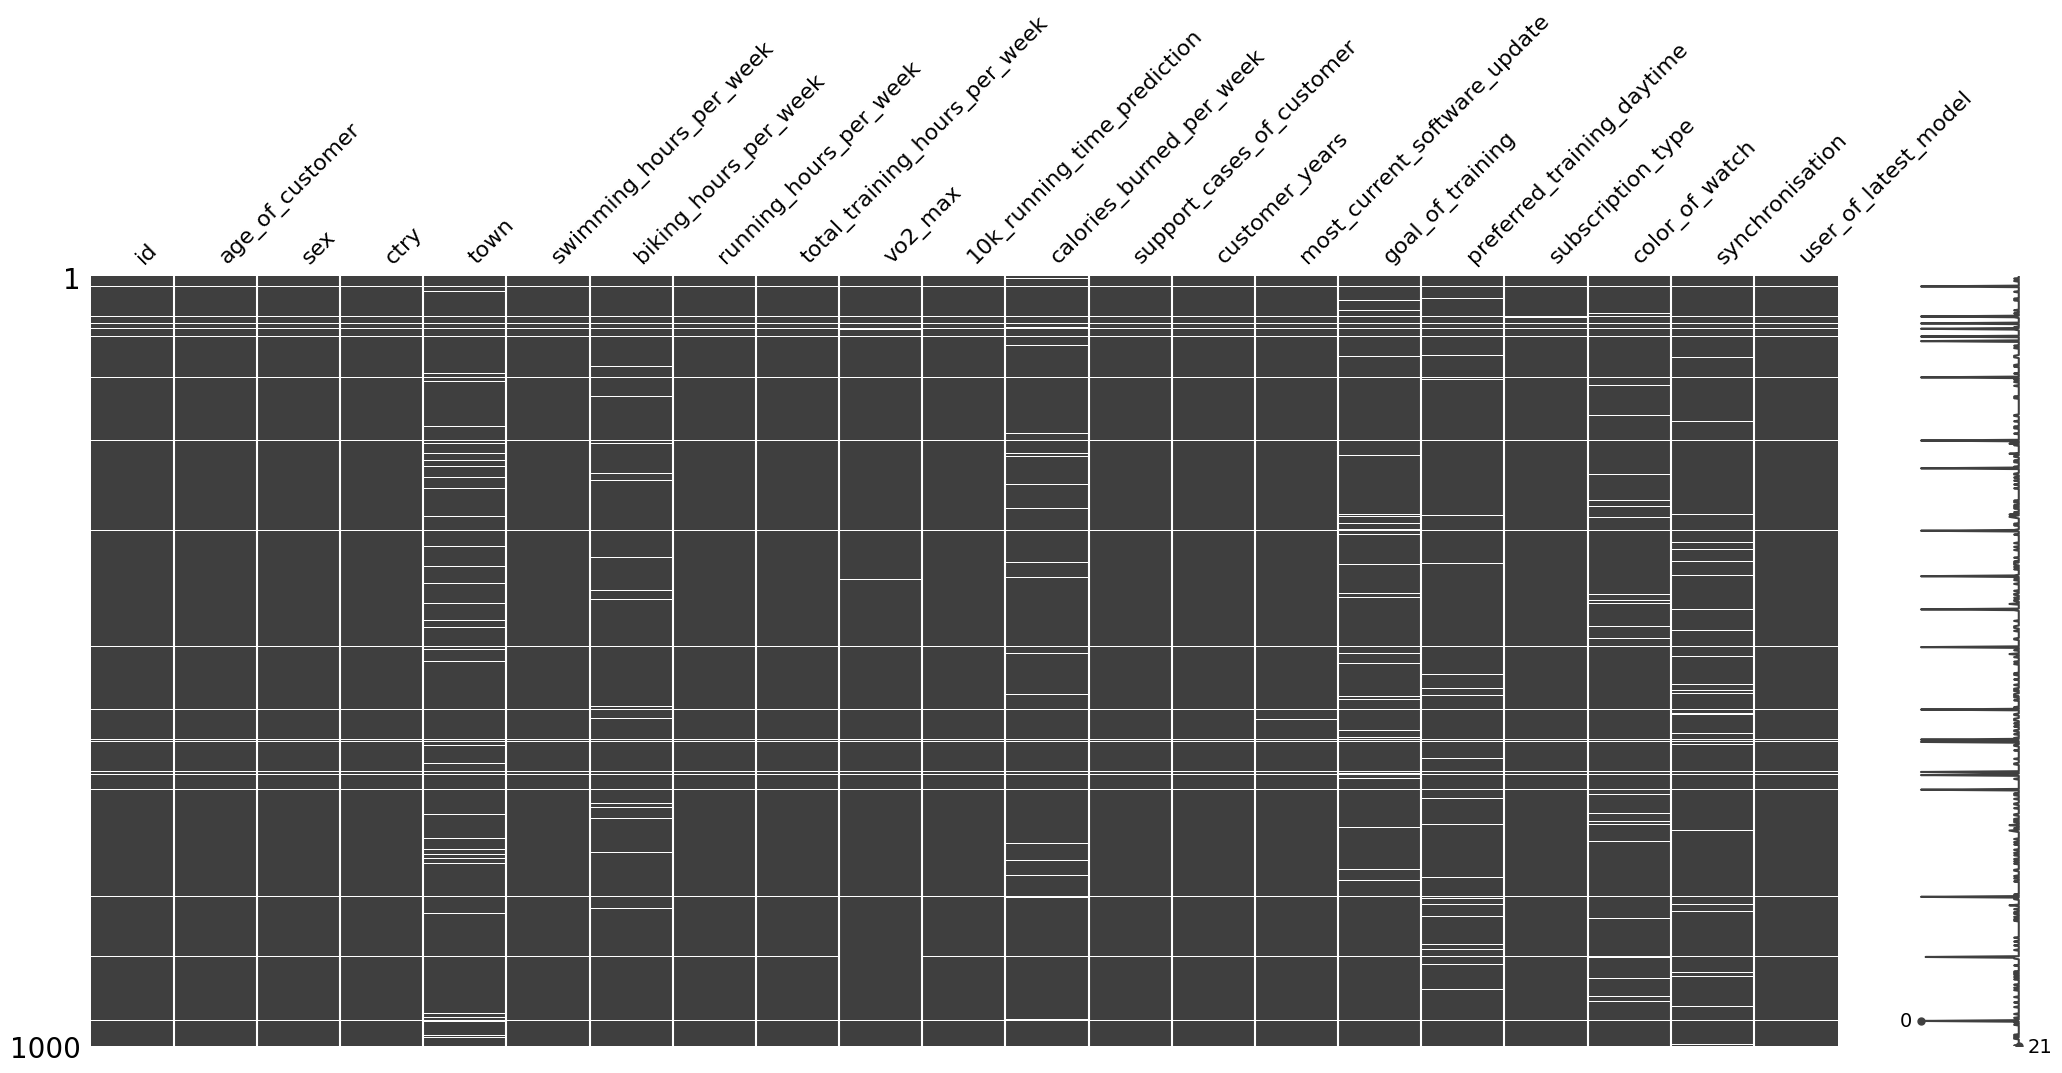

In [19]:
# Show all the missing values in the dataset
msno.matrix(df)

There multiple columns for which we have missing values. The most critical ones are the missing values in the target column. Here we will have to drop this entries, since there is no way to impute the missing values. Regarding the feature columns, we could impute the values using the mean value for the numerical columns and the mode for the categorical columns. 

In [111]:
# Missing values in percentage
prc_missing_values = df.isna().sum()/len(df)*100
avg_missing_values = round(np.mean(prc_missing_values),3)

print("Percentage of missing values per columns")
print(prc_missing_values)
print()
print("Percentage of Average missing values: ", avg_missing_values, " %")

Percentage of missing values per columns
id                               2.2
age_of_customer                  2.2
sex                              2.2
ctry                             2.2
town                             6.1
swimming_hours_per_week          2.2
biking_hours_per_week            4.6
running_hours_per_week           2.2
total_training_hours_per_week    2.2
vo2_max                          2.5
10k_running_time_prediction      2.2
calories_burned_per_week         4.1
support_cases_of_customer        2.2
customer_years                   2.2
most_current_software_update     2.3
goal_of_training                 5.0
preferred_training_daytime       4.6
subscription_type                2.3
color_of_watch                   5.4
synchronisation                  5.0
user_of_latest_model             2.2
dtype: float64

Percentage of Average missing values:  3.148  %


We have on average 3.15% missing values in our dataset. The column with the most missing values is the "Town" column with 6.1% missing values. 